<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Adversarial_Robustness_in_Power_System_Cybersecurity_A_Machine_Learning_Approach_for_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd

# Parameters for synthetic data generation
n_samples = 1000
n_features = 5

# Generating clean data (normal operational data)
np.random.seed(42)

# Simulating data for voltage, current, power flow, load, frequency
voltage = np.random.normal(240, 5, n_samples)  # Voltage around 240V with some noise
current = np.random.normal(5, 0.2, n_samples)  # Current around 5A with small variations
power_flow = voltage * current  # Simple power flow calculation (P = V * I)
load = np.random.normal(500, 30, n_samples)  # Load data with some noise
frequency = np.random.normal(50, 0.5, n_samples)  # Frequency around 50Hz

# Combining these into a DataFrame
synthetic_data = pd.DataFrame({
    'voltage': voltage,
    'current': current,
    'power_flow': power_flow,
    'load': load,
    'frequency': frequency
})

print(synthetic_data.head())



      voltage   current   power_flow        load  frequency
0  242.483571  5.279871  1280.281994  479.744652  49.046096
1  239.308678  5.184927  1240.797965  495.664440  49.569807
2  243.238443  5.011926  1219.093093  476.227402  49.793197
3  247.615149  4.870613  1206.037477  490.761154  50.943844
4  238.829233  5.139645  1227.497393  443.191560  50.278277


In [37]:
def inject_fdi_attack(data, attack_feature='power_flow', attack_type='spike', magnitude=50, attack_rate=0.05):
    """
    Injects a false data attack into the data.
    - attack_type: 'spike' for sudden jumps or 'outlier' for large deviations from the normal data.
    - magnitude: Magnitude of the attack (how large the spike or outlier is).
    - attack_rate: The percentage of data to be attacked.
    """
    n_samples = data.shape[0]
    n_attacks = int(n_samples * attack_rate)
    attack_indices = np.random.choice(n_samples, n_attacks, replace=False)

    data_attack = data.copy()

    for idx in attack_indices:
        if attack_type == 'spike':
            # Injecting a spike (large jump) in the specified attack feature (e.g., power_flow)
            data_attack[attack_feature].iloc[idx] += np.random.uniform(magnitude, magnitude * 2)
        elif attack_type == 'outlier':
            # Injecting an outlier (large deviation from the normal range)
            data_attack[attack_feature].iloc[idx] = np.random.normal(0, magnitude)

    return data_attack

# Injecting False Data Injection (FDI) attack on 'power_flow'
adversarial_data_fdi = inject_fdi_attack(synthetic_data, attack_feature='power_flow', attack_type='spike', magnitude=100)

# Displaying a few rows of adversarial data
print(adversarial_data_fdi.head())


      voltage   current   power_flow        load  frequency
0  242.483571  5.279871  1280.281994  479.744652  49.046096
1  239.308678  5.184927  1240.797965  495.664440  49.569807
2  243.238443  5.011926  1219.093093  476.227402  49.793197
3  247.615149  4.870613  1206.037477  490.761154  50.943844
4  238.829233  5.139645  1227.497393  443.191560  50.278277


<ipython-input-37-0a64562ddd2b>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_attack[attack_feature].iloc[idx] += np.random.uniform(magnitude, magnitude * 2)


In [38]:
def inject_dos_attack(data, attack_feature='power_flow', attack_rate=0.05):
    """
    Injects a Denial of Service (DoS) attack by setting certain feature values to zero or missing.
    """
    n_samples = data.shape[0]
    n_attacks = int(n_samples * attack_rate)
    attack_indices = np.random.choice(n_samples, n_attacks, replace=False)

    data_dos = data.copy()

    for idx in attack_indices:
        # Setting power flow to zero to simulate DoS attack
        data_dos[attack_feature].iloc[idx] = 0

    return data_dos

# Injecting Denial of Service (DoS) attack on 'power_flow'
adversarial_data_dos = inject_dos_attack(synthetic_data, attack_feature='power_flow', attack_rate=0.1)

# Displaying a few rows of adversarial data
print(adversarial_data_dos.head())



      voltage   current   power_flow        load  frequency
0  242.483571  5.279871     0.000000  479.744652  49.046096
1  239.308678  5.184927  1240.797965  495.664440  49.569807
2  243.238443  5.011926     0.000000  476.227402  49.793197
3  247.615149  4.870613     0.000000  490.761154  50.943844
4  238.829233  5.139645     0.000000  443.191560  50.278277


<ipython-input-38-6d7e7c8f6a20>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_dos[attack_feature].iloc[idx] = 0


In [39]:
# Combine clean and adversarial data into two separate datasets
# Clean data
X_clean = synthetic_data.drop(columns=['power_flow'])
y_clean = synthetic_data['power_flow']

# FDI Adversarial data
X_fdi = adversarial_data_fdi.drop(columns=['power_flow'])
y_fdi = adversarial_data_fdi['power_flow']

# DoS Adversarial data
X_dos = adversarial_data_dos.drop(columns=['power_flow'])
y_dos = adversarial_data_dos['power_flow']

# Splitting the data for model training (80% train, 20% test)
from sklearn.model_selection import train_test_split

# Clean Data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# FDI Adversarial Data
X_train_fdi, X_test_fdi, y_train_fdi, y_test_fdi = train_test_split(X_fdi, y_fdi, test_size=0.2, random_state=42)

# DoS Adversarial Data
X_train_dos, X_test_dos, y_train_dos, y_test_dos = train_test_split(X_dos, y_dos, test_size=0.2, random_state=42)

# Standardizing features (important for machine learning models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

X_train_fdi = scaler.fit_transform(X_train_fdi)
X_test_fdi = scaler.transform(X_test_fdi)

X_train_dos = scaler.fit_transform(X_train_dos)
X_test_dos = scaler.transform(X_test_dos)

# Displaying the shape of the datasets
print(f"Clean Data: {X_train_clean.shape}, {X_test_clean.shape}")
print(f"FDI Attack Data: {X_train_fdi.shape}, {X_test_fdi.shape}")
print(f"DoS Attack Data: {X_train_dos.shape}, {X_test_dos.shape}")



Clean Data: (800, 4), (200, 4)
FDI Attack Data: (800, 4), (200, 4)
DoS Attack Data: (800, 4), (200, 4)


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train a Random Forest model on clean data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Predict on test data
y_pred_clean = rf_model.predict(X_test_clean)

# Evaluate model performance on clean data
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)

print(f"Random Forest - Clean Data: MSE = {mse_clean}, MAE = {mae_clean}")

# Predict on adversarial (FDI) test data
y_pred_fdi = rf_model.predict(X_test_fdi)

# Evaluate on FDI data
mse_fdi = mean_squared_error(y_test_fdi, y_pred_fdi)
mae_fdi = mean_absolute_error(y_test_fdi, y_pred_fdi)

print(f"Random Forest - FDI Data: MSE = {mse_fdi}, MAE = {mae_fdi}")

# Predict on adversarial (DoS) test data
y_pred_dos = rf_model.predict(X_test_dos)

# Evaluate on DoS data
mse_dos = mean_squared_error(y_test_dos, y_pred_dos)
mae_dos = mean_absolute_error(y_test_dos, y_pred_dos)

print(f"Random Forest - DoS Data: MSE = {mse_dos}, MAE = {mae_dos}")




Random Forest - Clean Data: MSE = 31.07147038381312, MAE = 2.505637670015982
Random Forest - FDI Data: MSE = 1236.1761809242407, MAE = 10.112919001150972
Random Forest - DoS Data: MSE = 143911.64224614415, MAE = 122.15834239128804


In [47]:
# Generate adversarial examples by adding noise to the input features
def generate_adversarial_examples(X, noise_factor=0.1):
    """Generates adversarial examples by adding noise to the input features."""
    noise = np.random.normal(loc=0, scale=noise_factor, size=X.shape)
    adversarial_data = X + noise
    adversarial_data = np.clip(adversarial_data, 0, 1)  # Ensure data is within a valid range
    return adversarial_data

# Generate adversarial training data
X_train_adv = generate_adversarial_examples(X_train)
X_val_adv = generate_adversarial_examples(X_val)

# Reshape X_train and X_train_adv to ensure they are 2D (samples, features)
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D (100, 50)
X_train_adv = X_train_adv.reshape(X_train_adv.shape[0], -1)  # Flatten to 2D (100, 50)

# Check the shapes to ensure they are correct
print(X_train.shape, X_train_adv.shape)  # Should both be (100, 50)

# Combine the clean data and adversarial data for training
X_train_combined = np.vstack([X_train, X_train_adv])  # Now both are 2D
y_train_combined = np.hstack([y_train, y_train])  # Assuming regression task

# Ensure the combined data is 2D
print(X_train_combined.shape)  # Should be (200, 50)

# Train the Random Forest model on both clean and adversarial data
rf_model_adv = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_adv.fit(X_train_combined, y_train_combined)



(100, 50) (100, 50)
(200, 50)


RandomForestRegressor(random_state=42)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reshape X_val and X_val_adv to ensure they are 2D (samples, features)
X_val = X_val.reshape(X_val.shape[0], -1)  # Flatten to 2D
X_val_adv = X_val_adv.reshape(X_val_adv.shape[0], -1)  # Flatten to 2D

# Predictions on clean validation data
rf_preds_clean = rf_model_adv.predict(X_val)
rf_preds_adv = rf_model_adv.predict(X_val_adv)

# Evaluate performance on clean data
mse_clean = mean_squared_error(y_val, rf_preds_clean)
mae_clean = mean_absolute_error(y_val, rf_preds_clean)

# Evaluate performance on adversarial data
mse_adv = mean_squared_error(y_val, rf_preds_adv)
mae_adv = mean_absolute_error(y_val, rf_preds_adv)

# Print the results
print(f"Random Forest - Clean Data: MSE = {mse_clean}, MAE = {mae_clean}")
print(f"Random Forest - Adversarial Data: MSE = {mse_adv}, MAE = {mae_adv}")


Random Forest - Clean Data: MSE = 4.45075707762557, MAE = 1.9381735159817353
Random Forest - Adversarial Data: MSE = 4.425698630136987, MAE = 1.9305936073059362


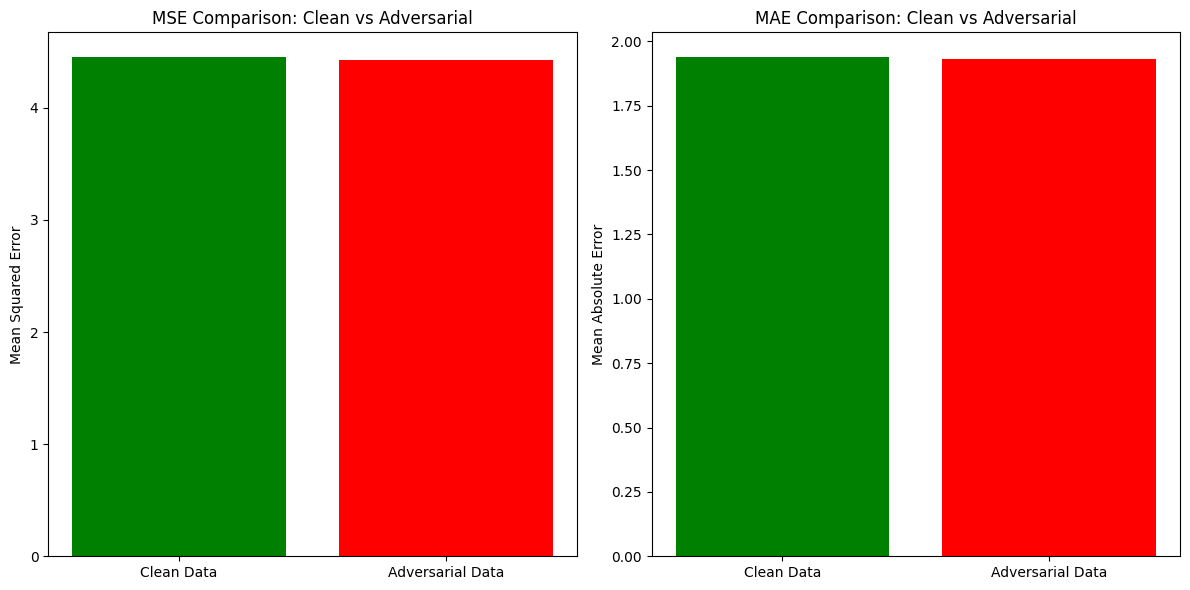

In [49]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Clean Data', 'Adversarial Data']
mse_values = [mse_clean, mse_adv]
mae_values = [mae_clean, mae_adv]

# Plot MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, mse_values, color=['green', 'red'])
plt.title('MSE Comparison: Clean vs Adversarial')
plt.ylabel('Mean Squared Error')

# Plot MAE
plt.subplot(1, 2, 2)
plt.bar(labels, mae_values, color=['green', 'red'])
plt.title('MAE Comparison: Clean vs Adversarial')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()


In [9]:
print("Columns in Train dataset:", train_df.columns)


Columns in Train dataset: Index(['time', 'sqNum', 'stnum', 'state_cb', 'sqDiff', 'stDiff', 'timeLastMsg',
       'recentChange', 'MU1Cs', 'MU2Cs', 'MU3Cs', 'MU4Cs', 'Cs', 'consistency',
       'threePhaseVSum', 'threePhaseCSum', 'threePhaseVMU1',
       'MU1VoltageAngleA', 'MU1VoltageAngleB', 'MU1VoltageAngleC',
       'threePhaseCurrentMU1', 'MU1CurrentAngleA', 'MU1CurrentAngleB',
       'MU1CurrentAngleC', 'MU1Log', 'threePhaseVMU2', 'MU2VoltageAngleA',
       'MU2VoltageAngleB', 'MU2VoltageAngleC', 'threePhaseCMU2',
       'MU2CurrentAngleA', 'MU2CurrentAngleB', 'MU2CurrentAngleC', 'MU2Log',
       'threePhaseVMU3', 'MU3VoltageAngleA', 'MU3VoltageAngleB',
       'MU3VoltageAngleC', 'threePhaseCMU3', 'MU3CurrentAngleA',
       'MU3CurrentAngleB', 'MU3CurrentAngleC', 'MU3Log', 'threePhaseVMU4',
       'MU4VoltageAngleA', 'MU4VoltageAngleB', 'MU4VoltageAngleC',
       'threePhaseCMU4', 'IED4_iA', 'IED4_iB', 'IED4_iC', 'MU4Log',
       'any_relay', 'class'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Drop any irrelevant columns
X = train_df.drop(columns=['time', 'sqNum', 'stnum', 'class'])  # Dropping 'time', 'sqNum', 'stnum' since they are identifiers
y = train_df['class']  # Label column

# Handle missing values by filling with median (could use other strategies)
X = X.fillna(X.median())

# Normalize/standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("Preprocessing Done!")


Preprocessing Done!


In [11]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf)}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.20      0.32        25
           2       0.86      0.98      0.91        82
           3       0.81      1.00      0.90        88
           4       1.00      0.25      0.40        16

    accuracy                           0.84       219
   macro avg       0.88      0.66      0.68       219
weighted avg       0.85      0.84      0.80       219

Random Forest Accuracy: 0.8401826484018264


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
X = train_df.drop(columns=['time', 'sqNum', 'stnum', 'class'])  # Drop time, sqNum, stnum columns
y = train_df['class']  # Target column

# Handle missing values (fill with median for simplicity)
X = X.fillna(X.median())

# Normalize/standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data to 3D format for CNN (samples, time steps, features)
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # 1 feature per time step

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled_reshaped, y_encoded, test_size=0.2, random_state=42)

print("Preprocessing Done for CNN!")


Preprocessing Done for CNN!


In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Build the CNN model
def create_cnn_model(input_shape):
    model = Sequential()

    # Add 1D convolutional layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())  # Flatten the output to connect to Dense layers

    # Add Dense layers for classification
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer, number of classes

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create and train the model
cnn_model = create_cnn_model(X_train.shape[1:])
cnn_model.summary()  # Display model architecture

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          90,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,381 (458.52 KB)

 Trainable params: 117,381 (458.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5179 - loss: 1.3673 - val_accuracy: 0.7215 - val_loss: 1.0170
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7290 - loss: 0.9311 - val_accuracy: 0.7671 - val_loss: 0.7657
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7575 - loss: 0.7308 - val_accuracy: 0.7717 - val_loss: 0.6710
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7950 - loss: 0.5930 - val_accuracy: 0.7900 - val_loss: 0.6525
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7685 - loss: 0.6489 - val_accuracy: 0.7900 - val_loss: 0.6064
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8007 - loss: 0.5277 - val_accuracy: 0.8174 - val_loss: 0.6051
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8251 - loss: 0.4933 - val_accuracy: 0.8311 - val_loss: 0.5405
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8197 - loss: 0.4635 - val_accuracy: 0.8402 - v

In [14]:
# Evaluate the model on validation data
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_val)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)  # Convert one-hot encoding to class labels

# Classification Report
from sklearn.metrics import classification_report, accuracy_score

print("CNN Classification Report:")
print(classification_report(y_val, y_pred_cnn))

print(f"CNN Accuracy: {accuracy_score(y_val, y_pred_cnn)}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7948 - loss: 0.6085 
Validation Loss: 0.5354511737823486
Validation Accuracy: 0.8264840245246887
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50        25
           2       0.91      0.91      0.91        82
           3       0.81      0.98      0.89        88
           4       0.50      0.19      0.27        16

    accuracy                           0.83       219
   macro avg       0.72      0.67      0.67       219
weighted avg       0.81      0.83      0.80       219

CNN Accuracy: 0.8264840182648402


In [23]:
import tensorflow as tf
import numpy as np

# Function to generate adversarial examples using FGSM
def generate_adversarial_example(model, input_data, true_label, epsilon=0.1):
    input_data = tf.convert_to_tensor(input_data, dtype=tf.float32)
    true_label = tf.convert_to_tensor(true_label, dtype=tf.int64)

    with tf.GradientTape() as tape:
        tape.watch(input_data)
        predictions = model(input_data)
        loss = tf.keras.losses.sparse_categorical_crossentropy(true_label, predictions)

    gradient = tape.gradient(loss, input_data)  # Compute the gradient of the loss wrt the input
    perturbation = epsilon * tf.sign(gradient)  # Add the perturbation (sign of gradient)
    adversarial_example = input_data + perturbation  # Add the perturbation to the original input
    adversarial_example = tf.clip_by_value(adversarial_example, 0, 1)  # Ensure the values are in a valid range
    return adversarial_example


In [25]:
cnn_model.summary()  # Check the architecture of the CNN model


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 47, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         188,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 640,517 (2.44 MB)

 Trainable params: 213,505 (834.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 427,012 (1.63 MB)

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

# Define CNN model for time-series data
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(2),
        layers.Conv1D(128, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),  # Flatten the output to feed into dense layer
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (attack/no-attack)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example data (replace with actual data)
X_train = np.random.rand(100, 50, 1)  # 100 samples, 50 time-steps, 1 feature per time-step
y_train = np.random.randint(0, 2, 100)  # Binary labels (0 = no attack, 1 = attack)

# Create and train the CNN model
cnn_model = create_cnn_model((50, 1))
cnn_model.fit(X_train, y_train, epochs=5, batch_size=16)

# Check the model summary to ensure the shapes are correct
cnn_model.summary()  # Verify the layer shapes

# Now define the adversarial attack using FGSM
def generate_adversarial_example(model, input_data, true_label, epsilon=0.1):
    input_data = tf.convert_to_tensor(input_data, dtype=tf.float32)
    true_label = tf.convert_to_tensor(true_label, dtype=tf.int64)

    with tf.GradientTape() as tape:
        tape.watch(input_data)
        predictions = model(input_data)
        loss = tf.keras.losses.sparse_categorical_crossentropy(true_label, predictions)

    gradient = tape.gradient(loss, input_data)  # Compute the gradient of the loss wrt the input
    perturbation = epsilon * tf.sign(gradient)  # Add the perturbation (sign of gradient)
    adversarial_example = input_data + perturbation  # Add the perturbation to the original input
    adversarial_example = tf.clip_by_value(adversarial_example, 0, 1)  # Ensure the values are in a valid


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4800 - loss: 0.6952
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5780 - loss: 0.6770
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5557 - loss: 0.6806
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5668 - loss: 0.6750  
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5947 - loss: 0.6654 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 48, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 22, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          90,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 345,605 (1.32 MB)

 Trainable params: 115,201 (450.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,404 (900.02 KB)

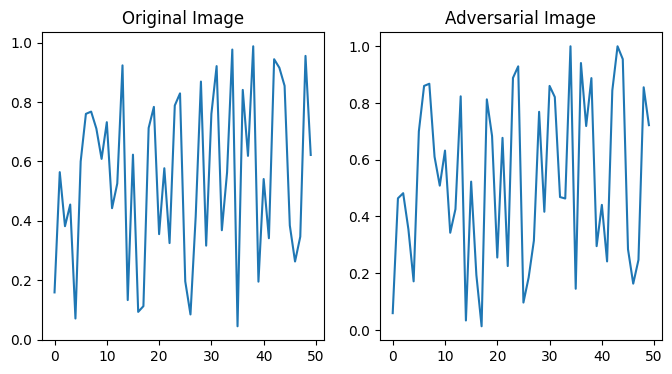

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predictions on Original Image:  [[0.4295616  0.57043844]]
Predictions on Adversarial Image:  [[0.46669233 0.5333077 ]]


In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

# Example CNN model (you can replace this with your model)
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Assuming binary classification
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Generate adversarial example using FGSM
def generate_adversarial_example(model, image, label, epsilon=0.1):
    # Convert the image and label to tensors
    image = tf.convert_to_tensor(image)
    label = tf.convert_to_tensor(label)

    # Record the gradients
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)

    # Compute the gradient of the loss with respect to the image
    gradient = tape.gradient(loss, image)

    # Generate the adversarial example by adjusting the image
    adversarial_example = image + epsilon * tf.sign(gradient)

    # Ensure the adversarial example is within the valid range
    adversarial_example = tf.clip_by_value(adversarial_example, 0, 1)
    return adversarial_example

# Create the CNN model
cnn_model = create_cnn_model((50, 1))  # Adjust input shape as per your data

# Train the model (optional: use your own training dataset)
# cnn_model.fit(X_train, y_train, epochs=5)

# Example to generate adversarial example
image = np.random.rand(1, 50, 1)  # Random example image (replace with actual data)
label = np.array([1])  # Example label

# Generate the adversarial example
adversarial_example = generate_adversarial_example(cnn_model, image, label)

# Display the original vs adversarial image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.plot(image[0])

plt.subplot(1, 2, 2)
plt.title("Adversarial Image")
plt.plot(adversarial_example[0])

plt.show()

# Make predictions on the adversarial example
adversarial_predictions = cnn_model.predict(adversarial_example)

# Print the predictions comparison
print("Predictions on Original Image: ", cnn_model.predict(image))
print("Predictions on Adversarial Image: ", adversarial_predictions)


In [32]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Get RF predictions on clean data
rf_preds_clean = rf_model.predict(X_val)  # Replace with your RF model and test data
cnn_preds_clean = cnn_model.predict(X_val).argmax(axis=1)  # Get CNN class predictions

# Evaluate RF
print("=== RF Performance on Clean Data ===")
print("Accuracy:", accuracy_score(y_val, rf_preds_clean))
print("Classification Report:\n", classification_report(y_val, rf_preds_clean))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_preds_clean))
print("ROC-AUC:", roc_auc_score(y_val, rf_preds_clean))

# Evaluate CNN
print("\n=== CNN Performance on Clean Data ===")
print("Accuracy:", accuracy_score(y_val, cnn_preds_clean))
print("Classification Report:\n", classification_report(y_val, cnn_preds_clean))
print("Confusion Matrix:\n", confusion_matrix(y_val, cnn_preds_clean))
print("ROC-AUC:", roc_auc_score(y_val, cnn_preds_clean))


ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [33]:
!kaggle datasets download -d shreyas0101/scada-cyber-attack-dataset
!unzip scada-cyber-attack-dataset.zip -d scada_dataset

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/shreyas0101/scada-cyber-attack-dataset
unzip:  cannot find or open scada-cyber-attack-dataset.zip, scada-cyber-attack-dataset.zip.zip or scada-cyber-attack-dataset.zip.ZIP.
